In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import adclasses
import math
import numpy as np
import random
import copy

Using TensorFlow backend.
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py:939: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [2]:
grok_path = "data/grok_asg_anomaly.csv"
rds_cc0c53_path = "data/rds_cpu_utilization_cc0c53.csv"
rds_e47b3b_path = "data/rds_cpu_utilization_e47b3b.csv"
art_daily_flatmiddle_path =  "data/art_daily_flatmiddle.csv"
ec2_cpu_utilization_5f5533_path =  "data/ec2_cpu_utilization_5f5533.csv"
ec2_cpu_utilization_ac20cd_path = "data/ec2_cpu_utilization_ac20cd.csv"
art_daily_nojump_path = "data/art_daily_nojump.csv"

# Concept Drift

We can determine if a time series exhibits concept drift, we use https://github.com/hildensia/bayesian_changepoint_detection which is based on https://arxiv.org/abs/0710.3742

# Datasets making up the concept drift corpora:

1. grok_asg_anomaly

2. rds_cpu_utilization_cc0c53
 
3. rds_cpu_utilization_e47b3b

4. art_daily_flatmiddle

5. ec2_cpu_utilization_5f5533

6. ec2_cpu_utilization_ac20cd

7. art_daily_nojump

8. artificial cd dataset 1

9. artificial cd dataset 2

10. artificial cd dataset 3

# grok_asg_anomaly

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

grok_asg_anomaly.csv only has 2 anomalies:

2014-01-20 08:30:00

2014-01-21 10:45:00

2014-01-29 00:45:00

Start date:  2014-01-16 00:00:00

End date:  2014-02-01 01:00:00

Median:   33.4447 

count    4621.000000
mean       27.684723
std        13.144795
min         0.000000
25%        33.333300
50%        33.444700
75%        33.557300
max        45.622900
Name: value, dtype: float64


,timestamp,value
0,2014-01-16 00:00:00,33.5573
1,2014-01-16 00:05:00,33.4460
2,2014-01-16 00:10:00,33.4447
3,2014-01-16 00:15:00,33.3333
4,2014-01-16 00:20:00,33.4447



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


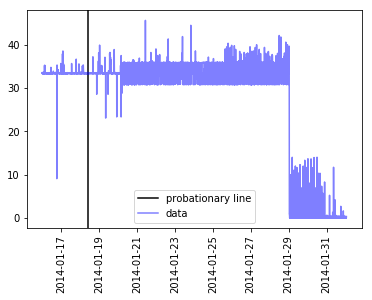

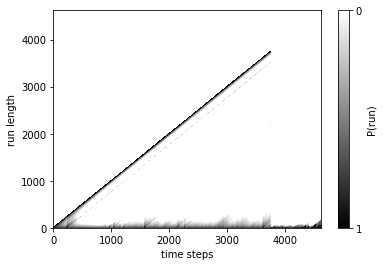

In [31]:
data = pd.read_csv(grok_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

# rds_cpu_utilization_cc0c53

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

rds_cpu_utilization_cc0c53.csv only has two anomalies:

2014-02-25 07:15:00

2014-02-27 00:50:00

Start date:  2014-02-14 14:30:00

End date:  2014-02-28 14:30:00

Median:   6.0820000000000025 

count    4032.000000
mean        8.112209
std         3.652528
min         5.190000
25%         6.009500
50%         6.082000
75%         7.104000
max        25.103300
Name: value, dtype: float64


,timestamp,value
0,2014-02-14 14:30:00,6.456
1,2014-02-14 14:35:00,5.816
2,2014-02-14 14:40:00,6.268
3,2014-02-14 14:45:00,5.816
4,2014-02-14 14:50:00,5.862



# of Missing time steps:  1


/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4683: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4683: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


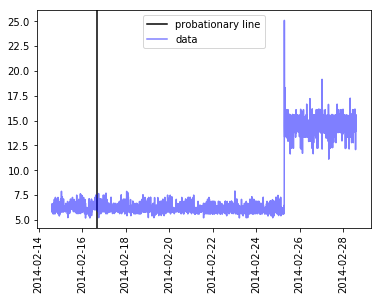

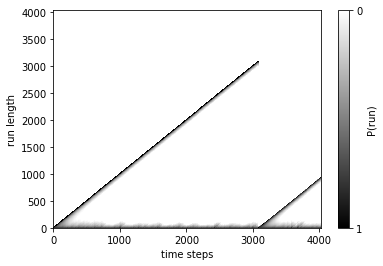

In [4]:
data = pd.read_csv(rds_cc0c53_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

#  rds_cpu_utilization_e47b3b

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

rds_cpu_utilization_e47b3b.csv only has two anomalies:

2014-04-13 06:52:00.000000

2014-04-18 23:37:00.000000

Start date:  2014-04-10 00:02:00

End date:  2014-04-23 23:57:00

Median:   16.677500000000002 

count    4032.000000
mean       18.934868
std         5.605191
min        12.628000
25%        15.835000
50%        16.677500
75%        25.521250
max        76.230000
Name: value, dtype: float64


,timestamp,value
0,2014-04-10 00:02:00,14.012
1,2014-04-10 00:07:00,13.334
2,2014-04-10 00:12:00,15.000
3,2014-04-10 00:17:00,13.998
4,2014-04-10 00:22:00,14.332



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4683: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/home/cfreeman/Documents/NextIT/adclasses2/adclasses2_venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4683: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:166: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:167: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


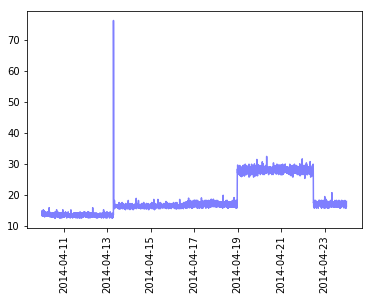

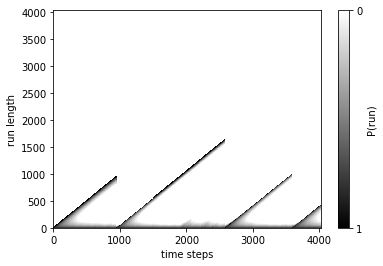

In [3]:
# IN DMKD PAPER
data = pd.read_csv(rds_e47b3b_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

# art_daily_flatmiddle

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

art_daily_flatmiddle.csv only has 2 anomalies:

2014-04-11 00:00:00

Start date:  2014-04-01 00:00:00

End date:  2014-04-14 23:55:00

Median:   -17.5412955583 

count    4032.000000
mean       18.981142
std        45.374171
min       -21.998789
25%       -19.929162
50%       -17.541296
75%        74.425223
max        87.958348
Name: value, dtype: float64


,timestamp,value
0,2014-04-01 00:00:00,-21.048383
1,2014-04-01 00:05:00,-20.295477
2,2014-04-01 00:10:00,-18.127229
3,2014-04-01 00:15:00,-20.171665
4,2014-04-01 00:20:00,-21.223762



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


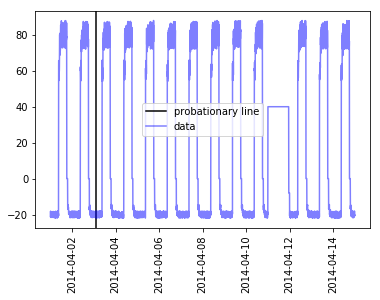

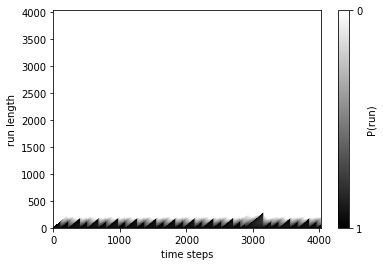

In [6]:
data = pd.read_csv(art_daily_flatmiddle_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

# ec2_cpu_utilization_5f5533

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

ec2_cpu_utilization_5f5533.csv only has 2 anomalies:

2014-02-19 00:22:00

2014-02-24 18:37:00

Start date:  2014-02-14 14:27:00

End date:  2014-02-28 14:22:00

Median:   42.918 

count    4032.000000
mean       43.110372
std         4.303565
min        34.766000
25%        39.296000
50%        42.918000
75%        46.006000
max        68.092000
Name: value, dtype: float64


,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


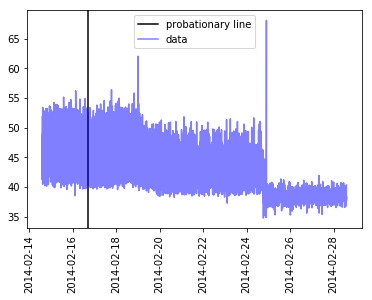

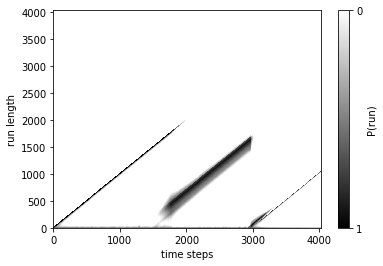

In [7]:
data = pd.read_csv(ec2_cpu_utilization_5f5533_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

#  ec2_cpu_utilization_ac20cd

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

ec2_cpu_utilization_ac20cd.csv only has 1 anomaly:

2014-04-15 00:49:00

Start date:  2014-04-02 14:29:00

End date:  2014-04-16 14:49:00

Median:   34.662 

count    4032.000000
mean       40.985085
std        21.921157
min         2.464000
25%        33.146000
50%        34.662000
75%        37.633000
max        99.742000
Name: value, dtype: float64


,timestamp,value
0,2014-04-02 14:29:00,42.652
1,2014-04-02 14:34:00,41.362
2,2014-04-02 14:39:00,43.408
3,2014-04-02 14:44:00,40.262
4,2014-04-02 14:49:00,40.328



# of Missing time steps:  5


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


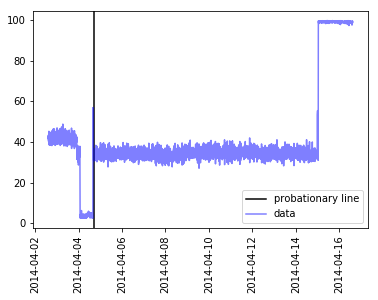

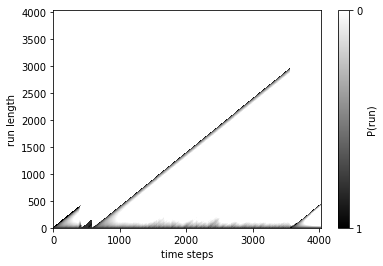

In [8]:
data = pd.read_csv(ec2_cpu_utilization_ac20cd_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

# art_daily_nojump

According to https://github.com/numenta/NAB/blob/master/labels/combined_labels.json

art_daily_nojump.csv only has 1 anomaly:

2014-04-11 09:00:00

Start date:  2014-04-01 00:00:00

End date:  2014-04-14 23:55:00

Median:   21.38151115305 

count    4032.000000
mean       40.818300
std        27.640676
min        18.000501
25%        19.697373
50%        21.381511
75%        74.786987
max        87.973314
Name: value, dtype: float64


,timestamp,value
0,2014-04-01 00:00:00,21.598011
1,2014-04-01 00:05:00,19.321392
2,2014-04-01 00:10:00,21.399938
3,2014-04-01 00:15:00,18.373916
4,2014-04-01 00:20:00,18.167499



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


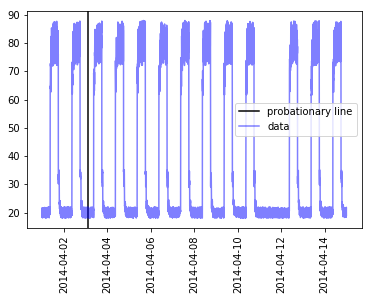

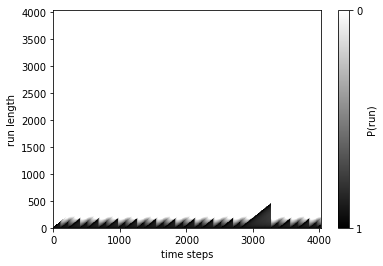

In [34]:
data = pd.read_csv(art_daily_nojump_path, header=0)
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

In [35]:
copied_dates = copy.deepcopy(data["timestamp"])

# Artificial CD dataset 1

Dates of anomalies are

2014-04-01 16:40:00

2014-04-02 09:20:00

2014-04-03 02:00:00

Start date:  2014-04-01T00:00:00.000000000

End date:  2014-04-03T18:35:00.000000000

Median:   9.986366896894285 

count    800.000000
mean      10.110445
std        5.223200
min        1.008098
25%        5.693585
50%        9.986367
75%       14.147008
max       19.972906
Name: value, dtype: float64


,timestamp,value
0,2014-04-01 00:00:00,3.790578
1,2014-04-01 00:05:00,5.903778
2,2014-04-01 00:10:00,5.080116
3,2014-04-01 00:15:00,6.131379
4,2014-04-01 00:20:00,7.468634



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


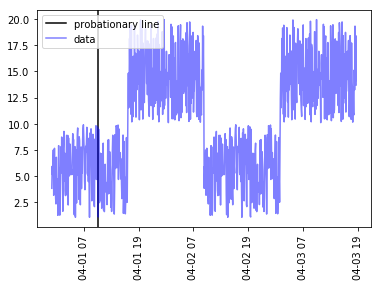

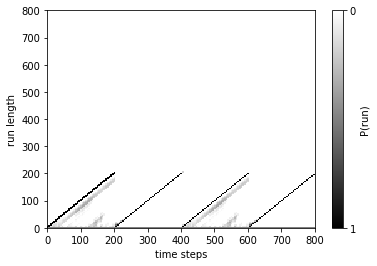

In [36]:
sample1 = [random.uniform(1, 10) for i in range(200)]
sample2 = [random.uniform(10, 20) for i in range(200)]
sample = sample1 + sample2 + sample1 + sample2
data = pd.DataFrame({"timestamp": copied_dates[0:len(sample)], "value": sample})
data.to_csv("data/artificial_cd_1.csv",index=False)

start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

# Artificial CD dataset 2

Dates of anomalies are

2014-04-01 16:40:00

2014-04-02 09:20:00

2014-04-03 02:00:00

2014-04-03 18:40:00

2014-04-04 11:20:00

2014-04-05 04:00:00

2014-04-05 20:40:00

2014-04-06 13:20:00

Start date:  2014-04-01T00:00:00.000000000

End date:  2014-04-07T05:55:00.000000000

Median:   11.174134737861442 

count    1800.000000
mean       15.281546
std        15.037679
min         1.003640
25%         6.151204
50%        11.174135
75%        17.501906
max        59.934833
Name: value, dtype: float64


,timestamp,value
0,2014-04-01 00:00:00,6.629715
1,2014-04-01 00:05:00,2.396108
2,2014-04-01 00:10:00,8.357435
3,2014-04-01 00:15:00,5.836694
4,2014-04-01 00:20:00,7.934909



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


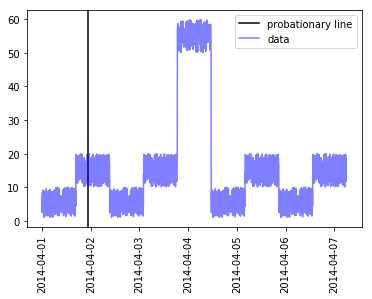

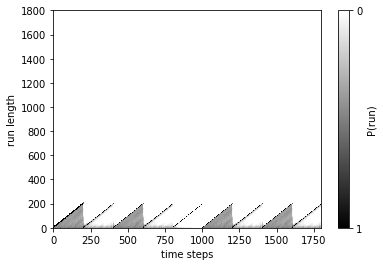

In [37]:
sample1 = [random.uniform(1, 10) for i in range(200)]
sample2 = [random.uniform(10, 20) for i in range(200)]
sample3 = [random.uniform(50, 60) for i in range(200)]

sample = sample1 + sample2 + sample1 + sample2 + sample3 + sample1 + sample2 + sample1 + sample2
data = pd.DataFrame({"timestamp": copied_dates[0:len(sample)], "value": sample})
data.to_csv("data/artificial_cd_2.csv")

start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)

# Artificial CD dataset 3

Dates of anomalies are

2014-04-01 16:40:00

2014-04-02 09:20:00

2014-04-03 02:00:00

2014-04-03 18:40:00

Start date:  2014-04-01T00:00:00.000000000

End date:  2014-04-04T11:15:00.000000000

Median:   25.13838434816219 

count    1000.000000
mean       25.188561
std        14.253778
min         1.042254
25%        12.641270
50%        25.138384
75%        37.587103
max        49.952299
Name: value, dtype: float64


,timestamp,value
0,2014-04-01 00:00:00,7.268554
1,2014-04-01 00:05:00,3.359981
2,2014-04-01 00:10:00,5.072772
3,2014-04-01 00:15:00,6.767274
4,2014-04-01 00:20:00,2.120884



# of Missing time steps:  0


/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:38: RuntimeWarning: divide by zero encountered in log
  unflattened_post_probs = -np.log(R1[0:-1:sparsity, 0:-1:sparsity])
/home/cfreeman/Documents/NextIT/adclasses2/adclasses.py:39: RuntimeWarning: divide by zero encountered in log
  post_probs = (-np.log(R1[0:-1:sparsity, 0:-1:sparsity])).flatten()


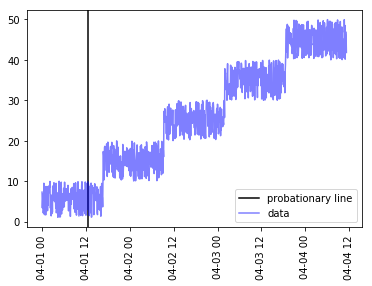

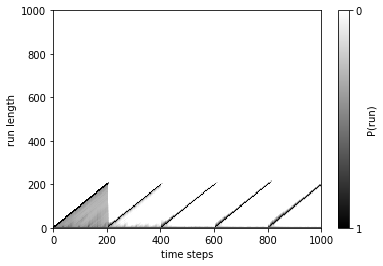

In [38]:
sample1 = [random.uniform(1, 10) for i in range(200)]
sample2 = [random.uniform(10, 20) for i in range(200)]
sample3 = [random.uniform(20, 30) for i in range(200)]
sample4 = [random.uniform(30, 40) for i in range(200)]
sample5 = [random.uniform(40, 50) for i in range(200)]

sample = sample1 + sample2 + sample3 + sample4 + sample5 
data = pd.DataFrame({"timestamp": copied_dates[0:len(sample)], "value": sample})
data.to_csv("data/artificial_cd_3.csv")
start_date = data["timestamp"].values[0]
end_date = data["timestamp"].values[-1]

print("Start date: ", start_date)
print("\nEnd date: ", end_date)
print("\nMedian:  ",np.median(data["value"].values), "\n")
print(data["value"].describe())
display(data.head())

# determine if there are missing time steps
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")
missing = adclasses.find_missing_time_steps(start_date, end_date, '5min', data)
print("\n# of Missing time steps: ", len(missing))

# there are missing steps. interpolate missing time steps
data = adclasses.fill_missing_time_steps(start_date, end_date, '5min', data, method="linear")
data["timestamp"] = pd.to_datetime(data["timestamp"],format="%Y-%m-%d %H:%M:%S")

adclasses.determine_concept_drift(data)